# Atividade Prática 03

## Teorema Central do Limite
Isabella Menezes Ramos - 3474

In [12]:
import pandas as pd
import numpy as np

In [5]:
 pd.options.display.float_format = "{:.2f}".format

In [6]:
# Ler dados de uma população de rendas (renda_populacao.csv)
renda = pd.read_csv('P03-dados/renda_populacao.csv', index_col=False,header=None,squeeze=True)
display(renda)

0        9536.34
1      267273.60
2       39596.61
3       24992.04
4        9286.11
          ...   
9995    31717.13
9996    30511.21
9997     9335.55
9998     9905.62
9999   122687.20
Name: 0, Length: 10000, dtype: float64

In [7]:
# Calcular estatísticas descritivas dessa população (média, mediana, quartis, erro padrão, min, max)
renda.describe()

count     10000.00
mean      36210.55
std       46539.07
min         391.72
25%       11205.69
50%       22006.79
75%       43049.55
max     1119768.63
Name: 0, dtype: float64

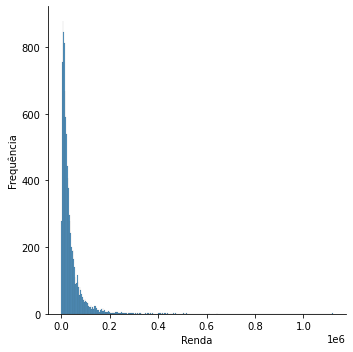

In [8]:
# Plotar a distribuição dessa população (Observação: Por enquanto vamos aceitar esse código usando as bibliotecas matplotlib e seaborn. Depois vamos entender melhor como gerar gráficos)
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.displot(renda)
ax.set(xlabel='Renda', ylabel='Frequência')
plt.show()

In [9]:
# Gerar uma amostra dessa população de tamanho 100
amostra = renda.sample(100)

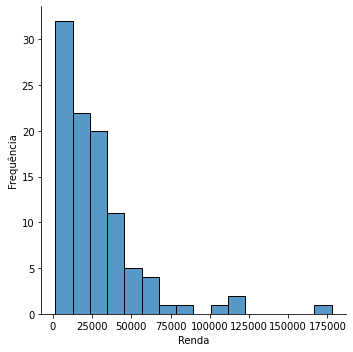

In [10]:
# Plotar a amostra (observação: os resultados de cada execução serão diferentes, pois estamos pegando amostras aleatórias)
ax=sns.displot(amostra)
ax.set(xlabel='Renda', ylabel='Frequência')
plt.show()

In [11]:
# Calcular a média da amostra. Esse valor está dentro do esperado para a população? Repita os últimos 3 passos (gerar amostra, plotar amostra, calcular média da amostra) algumas vezes para verificar o que acontece com a média. (observação: os resultados de cada execução serão diferentes, pois estamos pegando amostras aleatórias)
amostra.describe()

count      100.00
mean     27849.02
std      27168.91
min       1485.96
25%       9235.53
50%      21738.22
75%      35222.14
max     177774.28
Name: 0, dtype: float64

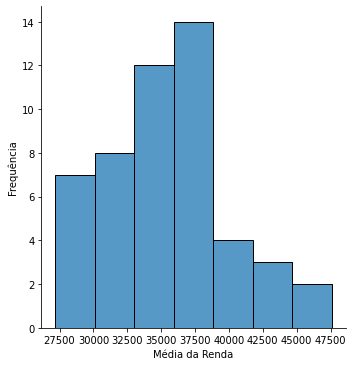

Média: 35546.32207
Erro Padrão: 6581.617721860771


In [13]:
# Gerar 50 amostras aleatórias da população, calcular a média de cada amostra, plotar a distribuição das médias, e calcular a média das médias das amostras e o erro padrão

# Gerar 50 amostras do tamanho 100 e plotar as médias das amostras
medias = []
for i in range(0,50):
    amostra=renda.sample(100)
    media = amostra.mean()
    medias.append(media)

# Mostra o histograma das médias
ax=sns.displot(medias)
ax.set(xlabel='Média da Renda', ylabel='Frequência')
plt.show()

media_das_medias = np.mean(medias)
erro_padrao = renda.std()/np.sqrt(len(medias))

print(f"Média: {media_das_medias}")
print(f"Erro Padrão: {erro_padrao}")

In [14]:
# Repetir o passo anterior (gerar amostras), mas agora gerar um número maior de amostras (100,250,500). Podemos observar que a distribuição das médias se aproxima mais da distribuição Normal? E o que acontece com o erro padrão?

# Gerar N amostras de tamanho T e plotar as médias das amostras
def analisa_amostras(N=50,T=100):

    medias = []
    for i in range(0,N):
        amostra = renda.sample(T)
        media = amostra.mean()
        medias.append(media)
    
    # Mostra o histograma das médias
    ax = sns.displot(medias)
    ax.set(xlabel = 'Média da Renda', ylabel='Frequência')
    plt.show()

    media_das_medias = np.mean(medias)
    erro_padrao = renda.std()/np.sqrt(len(medias))

    print(f"Média: {media_das_medias}")
    print(f"Erro Padrão: {erro_padrao}")

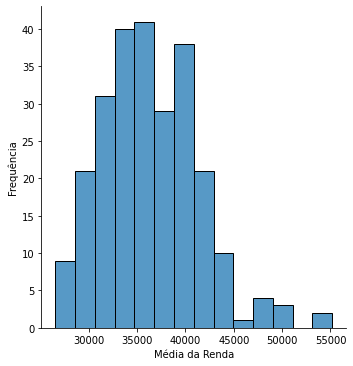

Média: 36416.281439599996
Erro Padrão: 2943.3889255995978


In [15]:
analisa_amostras(N=250,T=100)

In [16]:
# Ler o arquivo de amostra de rendas (renda_amostra1.csv)
amostra1 = pd.read_csv('P03-dados/renda_amostra1.csv', index_col=False,header=None,squeeze=True)

In [17]:
# Verificar se essa amostra faz parte da população de renda (renda.csv) ou não: calcular a média e o erro padrão, verificar a quantos erros da média da população a média da amostra está

media_populacao = renda.mean()
media_amostra = amostra1.mean()
erro_padrao = renda.std()/np.sqrt(len(amostra1))

print(f'Média População: {media_populacao}')
print(f'Média Amostra: {media_amostra}')
print(f'Erro Padrão: {erro_padrao}')

Média População: 36210.551772
Média Amostra: 35515.00230000001
Erro Padrão: 4653.906522305308


In [18]:
# Calcula a diferença entre a média da população e da amostra, em termos do erro padrão

distancia = abs(media_populacao-media_amostra)/erro_padrao
print(f'A diferença entre a média da população e da amostra é de {distancia} erros padrão.')

A diferença entre a média da população e da amostra é de 0.14945497264853783 erros padrão.


## Atividades

### Ler dados de uma população de pesos (pesos_populacao.csv) e em seguida, fazer as seguintes verificações:

### a) Ler dados da amostra de pesos 1 (amostra_pesos1.csv) e verificar se essa amostra foi retirada ou não da população de pesos. Justifique.


In [22]:
pesos = pd.read_csv('P03-dados/pesos_populacao.csv', index_col=False,header=None,squeeze=True)

In [38]:
def getDistancia(populacao, amostra):
    media_populacao = populacao.mean()
    media_amostra = amostra.mean()
    erro_padrao = populacao.std()/np.sqrt(len(amostra))

    distancia = abs(media_populacao-media_amostra)/erro_padrao

    return distancia


In [20]:
amostra_peso1 = pd.read_csv('P03-dados/pesos_amostra1.csv', index_col=False,header=None,squeeze=True)

In [26]:
print(f'A diferença entre a média da população e da amostra é de {getDistancia(pesos,amostra_peso1)} erros padrão.')
print('Logo, essa amostra foi retirada da população.')

A diferença entre a média da população e da amostra é de 0.06787193856048412 erros padrão.
Logo, essa amostra foi retirada da população.


### b) Ler dados da amostra de pesos 2 (amostra_pesos2.csv) e verificar se essa amostra foi retirada ou não da população de pesos. Justifique.

In [27]:
amostra_peso2 = pd.read_csv('P03-dados/pesos_amostra2.csv', index_col=False,header=None,squeeze=True)

In [29]:
print(f'A diferença entre a média da população e da amostra é de {getDistancia(pesos,amostra_peso2)} erros padrão.')
print('Logo, essa amostra NÂO foi retirada da população.')

A diferença entre a média da população e da amostra é de 59.24766210534879 erros padrão.
Logo, essa amostra NÂO foi retirada da população.


### c) Ler dados da amostra de pesos 3 (amostra_pesos3.csv) e verificar se essa amostra foi retirada ou não da população de pesos. Justifique.

In [30]:
amostra_peso3 = pd.read_csv('P03-dados/pesos_amostra3.csv', index_col=False,header=None,squeeze=True)

In [31]:
print(f'A diferença entre a média da população e da amostra é de {getDistancia(pesos,amostra_peso3)} erros padrão.')
print('Logo, essa amostra NÂO foi retirada da população.')

A diferença entre a média da população e da amostra é de 32.04554795410499 erros padrão.
Logo, essa amostra NÂO foi retirada da população.


### d) Ler dados da amostra de pesos 4 (amostra_pesos4.csv) e verificar se essa amostra foi retirada ou não da população de pesos. Justifique.

In [32]:
amostra_peso4 = pd.read_csv('P03-dados/pesos_amostra4.csv', index_col=False,header=None,squeeze=True)

In [39]:
print(f'A diferença entre a média da população e da amostra é de {getDistancia(pesos,amostra_peso4)} erros padrão.')
print('Logo, essa amostra foi retirada da população.')

A diferença entre a média da população e da amostra é de 5.098573438622101 erros padrão.
Logo, essa amostra foi retirada da população.


### e) É provável que as amostras 2 e 3 tenham vindo de uma mesma população? Justifique

In [41]:
print(f'A diferença entre a média da população e da amostra é de {getDistancia(amostra_peso2,amostra_peso3)} erros padrão.')
print("Como o erro padrão entre as duas amostras são bem altos, provavelmente as amostras 2 e 3 NÃO tenham vindo da mesma população.")

A diferença entre a média da população e da amostra é de 69.02689606928726 erros padrão.
Como o erro padrão entre as duas amostras são bem altos, provavelmente as amostras 2 e 3 NÃO tenham vindo da mesma população.
